# Session 6: Machine Learning
MSA 8010: Data Programming

Agenda:
- Linear Regression Example
- Logistic Regression
- Decision Trees

Sources:
- 
- https://github.com/jingjingsky120/MachineLearning_101
- https://www.kaggle.com/vipulgandhi/a-guide-to-decision-trees-for-beginners
- https://www.kaggle.com/shirantha/bank-marketing-data-a-decision-tree-approach
- https://www.kaggle.com/hamelg/python-for-data-29-decision-trees
- https://www.kaggle.com/dmilla/introduction-to-decision-trees-titanic-dataset/notebook
- https://www.kaggle.com/dansbecker/handling-missing-values/notebook

### Exercise

With WW2 weather data (located at: `data/weather.csv`):
- Explore data with visualizations
- Create a linear regression model
- Show Mean Squerd Error


In [1]:
import pandas as pd
df = pd.read_csv("data/weather.csv",usecols=["MaxTemp","MinTemp","MeanTemp","MAX","MIN","MEA"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   MaxTemp   119040 non-null  float64
 1   MinTemp   119040 non-null  float64
 2   MeanTemp  119040 non-null  float64
 3   MAX       118566 non-null  float64
 4   MIN       118572 non-null  float64
 5   MEA       118542 non-null  float64
dtypes: float64(6)
memory usage: 5.4 MB


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# This line adds more features of the plot
%matplotlib notebook 

#o means circle marker
#more info: See "marker" section at https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
df.plot(x = 'MinTemp', y='MaxTemp', style='.') 
plt.title('Min vs. Max')
plt.xlabel('Min Temprature')
plt.ylabel('Max Temprature')

plt.show()

<IPython.core.display.Javascript object>

### Seaborn

Seaborn is another visualization library built on top of `matplotlib`.

#### Installation:
`conda install seaborn`. 

Or, `pip install seaborn`.

#### Importing:
`import seaborn as sns`

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure() #New figure (don't update the previous one)

sns.countplot(x = 'MaxTemp', data = df, palette = 'magma')
plt.title('Weather')
plt.show()

<IPython.core.display.Javascript object>

In [4]:
print(df.shape)
#Removing rows having null values. For one column:
df=df[~df['MeanTemp'].isna()]

#For all columns:
for col in ["MaxTemp","MinTemp","MeanTemp","MAX","MIN","MEA"]:
    df=df[~df[col].isna()]
    print(df.shape)

#now, re-run Figure 1 to see the difference.

(119040, 6)
(119040, 6)
(119040, 6)
(119040, 6)
(118566, 6)
(118542, 6)
(118540, 6)


In [5]:
#Let's fix crowded X labels in the previous plot
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(8,4))
sns.countplot(data=df[(df['MaxTemp']>20) & (df['MaxTemp']<40)], x='MaxTemp', palette = 'magma', ax=ax1)
ax1.set_xticklabels(['{:.0f}'.format(float(t.get_text())) for t in ax1.get_xticklabels()])
ax1.xaxis.set_tick_params(rotation=90)

plt.title('Max Termpreature Count')
plt.show()

<IPython.core.display.Javascript object>

In [6]:
from sklearn.preprocessing import minmax_scale # to scale values between 0 and 1

fig, ax = plt.subplots(3, 2, figsize=(10, 6)) # a plot of 3 rows, and 2 columns
sns.histplot(data=df['MeanTemp'], ax=ax[0][0])

sns.histplot(df['MeanTemp'], ax=ax[0][0])
df['MeanTemp_scaled'] = minmax_scale(df['MeanTemp'])
sns.histplot(df['MeanTemp_scaled'], ax=ax[0][1])

sns.histplot(df['MAX'], ax=ax[1][0])
df['MAX_scaled'] = minmax_scale(df['MAX'])
sns.histplot(df['MAX_scaled'], ax=ax[1][1])

sns.histplot(df['MIN'], ax=ax[2][0])
df['MIN_scaled'] = minmax_scale(df['MIN'])
sns.histplot(df['MIN_scaled'], ax=ax[2][1])

fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

In [7]:
df.head()

,MaxTemp,MinTemp,MeanTemp,MAX,MIN,MEA,MeanTemp_scaled,MAX_scaled,MIN_scaled
0,25.555556,22.222222,23.888889,78.0,72.0,75.0,0.786765,0.706667,0.832061
1,28.888889,21.666667,25.555556,84.0,71.0,78.0,0.808824,0.746667,0.824427
2,26.111111,22.222222,24.444444,79.0,72.0,76.0,0.794118,0.713333,0.832061
3,26.666667,22.222222,24.444444,80.0,72.0,76.0,0.794118,0.720000,0.832061
4,26.666667,21.666667,24.444444,80.0,71.0,76.0,0.794118,0.720000,0.824427


In [8]:
# Having Min temprature, we want to predit the Max temprature
# sklearn expects a 2D array as input, so we reshape values
X=df["MinTemp"].values.reshape(-1,1)
y=df["MaxTemp"].values.reshape(-1,1)


print(X.shape)
print(y.shape)
print("X=",X)

(118540, 1)
(118540, 1)
X= [[22.22222222]
 [21.66666667]
 [22.22222222]
 ...
 [18.33333333]
 [18.33333333]
 [17.22222222]]


In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(94832, 1)
(23708, 1)
(94832, 1)
(23708, 1)


In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()  
model.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [11]:
y_pred= model.predict(X_test)
print(y_pred)

[[22.09425714]
 [33.05453062]
 [21.09786864]
 ...
 [23.09064564]
 [32.05814213]
 [30.56355938]]


In [12]:
from sklearn.metrics import r2_score
print("Accuracy:")
r2_score(y_pred,y_test)

Accuracy:


0.6860084608882899

In [13]:
df_prediction = pd.DataFrame({'Actual': y_test[:,0], 'Predicted': y_pred[:,0]})
df_prediction

,Actual,Predicted
0,26.666667,22.094257
1,29.444444,33.054531
2,18.888889,21.097869
3,30.000000,26.578005
4,5.000000,13.126761
...,...,...
23703,32.777778,32.556336
23704,23.888889,28.072588
23705,27.777778,23.090646
23706,29.444444,32.058142


### Dealing with missing values
#### Method 1:
- Drop columns with missing values


In [14]:
import pandas as pd

# Load data
melb_data = pd.read_csv('data/melb_data.csv')

melb_target = melb_data.Price
melb_predictors = melb_data.drop(['Price'], axis=1)

# We'll use only numeric predictors. 
melb_numeric_predictors = melb_predictors.select_dtypes(exclude=['object'])
melb_numeric_predictors.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
1,2,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
2,3,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0
3,3,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.7969,144.9969,4019.0
4,4,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(melb_numeric_predictors, 
                                                    melb_target,
                                                    train_size=0.7, 
                                                    test_size=0.3, 
                                                    random_state=0)

In [16]:
# A function to score dataset (it returns the mean squared error)
def score_dataset(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_squared_error(y_test, preds)

In [17]:
cols_with_missing = [col for col in X_train.columns 
                                 if X_train[col].isnull().any()]
cols_with_missing
#To view one: #melb_numeric_predictors[melb_numeric_predictors['Car'].isna()]

['Car', 'BuildingArea', 'YearBuilt']

In [18]:
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_test  = X_test.drop(cols_with_missing, axis=1)
print("Mean Squared Error after dropping columns with Missing Values:")
print(score_dataset(reduced_X_train, reduced_X_test, y_train, y_test))

Mean Squared Error after dropping columns with Missing Values:
216480558034.74423


#### Method 2: 
- removing rows having missing values

In [19]:
melb_data = pd.read_csv('data/melb_data.csv')
print(len(melb_data))

melb_data = melb_data[~melb_data['Car'].isna()]
melb_data = melb_data[~melb_data['BuildingArea'].isna()]
melb_data = melb_data[~melb_data['YearBuilt'].isna()]
print(len(melb_data))

melb_predictors = melb_data.drop(['Price'], axis=1)
melb_numeric_predictors = melb_predictors.select_dtypes(exclude=['object'])
melb_target = melb_data.Price

# print(score_dataset(reduced_X_train2, reduced_X_test, y_train, y_test))
# reduced_X_train = X_train.drop(cols_with_missing, axis=1)
# reduced_X_test  = X_test.drop(cols_with_missing, axis=1)
# print("Mean Squared Error after dropping columns with Missing Values:")
# print(score_dataset(reduced_X_train, reduced_X_test, y_train, y_test))

13580
6830


In [20]:
X_train, X_test, y_train, y_test = train_test_split(melb_numeric_predictors, 
                                                    melb_target,
                                                    train_size=0.7, 
                                                    test_size=0.3, 
                                                    random_state=0)

print("Mean Squared Error after dropping rows with Missing Values:")
print(score_dataset(X_train, X_test, y_train, y_test))              

Mean Squared Error after dropping rows with Missing Values:
201344163351.66483


#### Method 3: 
- Imputing missing values with mean

In [21]:
melb_data = pd.read_csv('data/melb_data.csv')

melb_predictors = melb_data.drop(['Price'], axis=1)
melb_numeric_predictors = melb_predictors.select_dtypes(exclude=['object'])
melb_target = melb_data.Price

X_train, X_test, y_train, y_test = train_test_split(melb_numeric_predictors, 
                                                    melb_target,
                                                    train_size=0.7, 
                                                    test_size=0.3, 
                                                    random_state=0)

In [22]:
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer(strategy='mean') #mean is default
#more: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=imputer#sklearn.impute.SimpleImputer

imputed_X_train = my_imputer.fit_transform(X_train)
imputed_X_test = my_imputer.transform(X_test)
print("Mean Squared Error from Imputation:")
print(score_dataset(imputed_X_train, imputed_X_test, y_train, y_test))

Mean Squared Error from Imputation:
201226675449.108


#### Saving a new dataset on the disk

In [23]:
train_df = pd.DataFrame(imputed_X_train, columns = melb_numeric_predictors.columns)
train_df.to_csv('data/train_x.csv')

### Logistic Regression
- Similar to linear regression, but for binary classification of categorical data.
- Examples: pass/fail, win/lose, alive/dead or healthy/sick
- In other words, it deals with one outcome variable with two states of the variable - either 0 or 1.
- Multi-class classification is possible, but logistic regression is mostly used in binary classification.


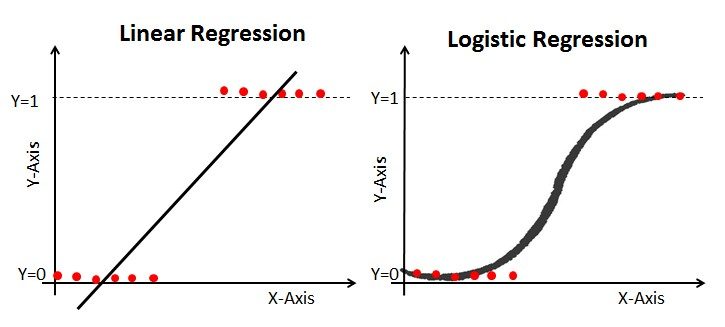

#### Some of advantages:
1.
1.
1. 

#### Some of disadvantages:
1. It can not handle large number of categorical variables, it means it cannot be used on a heavy model.
1. 
1. 

In [24]:
titanic = pd.read_csv("data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
X = titanic.drop(columns=['Survived'])
y = titanic['Survived'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [26]:
# check missing values in train data
print("Train rows=",len(X_train))
X_train.isnull().sum()

Train rows= 712


PassengerId      0
Pclass           0
Name             0
Sex              0
Age            132
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          545
Embarked         2
dtype: int64

#### Data description:

- **Survival** - Survival (0 = No; 1 = Yes)
- **Pclass** - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- **SibSp** - Number of Siblings/Spouses Aboard
- **Parch** - Number of Parents/Children Aboard
- **Ticket** - Ticket Number
- **Fare** - Passenger Fare
- **Embarked** - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [27]:
#Remove cabin data since there are many null values
X_train = X_train.drop(['Cabin'], axis=1)
X_test = X_test.drop(['Cabin'], axis=1)

In [28]:
sns.displot(X_train['Age'])

<IPython.core.display.Javascript object>

In [29]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
plt.figure()
print(X_train['Embarked'].value_counts())
sns.countplot(x='Embarked', data=X_train, palette='Set2')
plt.show()

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):


<IPython.core.display.Javascript object>

S    523
C    131
Q     56
Name: Embarked, dtype: int64


In [30]:
plt.figure(figsize=(10,8))
ax = sns.kdeplot(titanic["Fare"][titanic.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(titanic["Fare"][titanic.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

<IPython.core.display.Javascript object>

In [31]:
#Feature engineering, adding a new feature `family_size`
#Removing Parch, and SibSp
# adding a new feature `is_alone`
for dataset in [X_train, X_test]:
    dataset['family_size'] = dataset['Parch'] + dataset['SibSp']
    dataset.drop(['Parch', 'SibSp'], axis=1, inplace=True)
    dataset['is_alone'] = 1
    dataset['is_alone'].loc[dataset['family_size'] > 1] = 0

/Users/sabersoleymani/opt/anaconda3/envs/msa8010/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/sabersoleymani/opt/anaconda3/envs/msa8010/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [32]:
X_train[15:18]

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_size,is_alone
791,792,2,"Gaskell, Mr. Alfred",male,16.0,239865,26.000,S,0,1
17,18,2,"Williams, Mr. Charles Eugene",male,NaN,244373,13.000,S,0,1
86,87,3,"Ford, Mr. William Neal",male,16.0,W./C. 6608,34.375,S,4,0


In [33]:
#Feature engineering
#Adding titles instead of names
for dataset in [X_train, X_test]:
    dataset['title'] =  dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    dataset = dataset.drop(["Name"], axis=1)

X_train.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_size,is_alone,title
735,736,3,"Williams, Mr. Leslie",male,28.5,54636,16.1000,S,0,1,Mr
193,194,2,"Navratil, Master. Michel M",male,3.0,230080,26.0000,S,2,0,Master
788,789,3,"Dean, Master. Bertram Vere",male,1.0,C.A. 2315,20.5750,S,3,0,Master
856,857,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,36928,164.8667,S,2,0,Mrs
138,139,3,"Osen, Mr. Olaf Elon",male,16.0,7534,9.2167,S,0,1,Mr


In [34]:
pd.crosstab(X_train['title'], X_train['Sex'])

Sex,female,male
title,,
Col,0,2
Don,0,1
Dr,1,4
Jonkheer,0,1
Lady,1,0
Major,0,1
Master,0,30
Miss,142,0
Mlle,1,0


In [35]:
def get_cat_cols(df):
    obj_cols = df.columns[df.dtypes == 'object']
    cat_cols = df.columns[df.dtypes == 'category']
    return set(obj_cols).union(set(cat_cols))

cat_cols = get_cat_cols(X_train)
cat_cols

{'Embarked', 'Name', 'Sex', 'Ticket', 'title'}

In [36]:
Selected_features = ['Age', 'Fare', 'is_alone', 'Pclass']
X_train = X_train[Selected_features]
X_test = X_test[Selected_features]

In [37]:
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer(strategy='most_frequent')
imputed_X_train = my_imputer.fit_transform(X_train)
imputed_X_test = my_imputer.transform(X_test)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

model = LogisticRegression()
model.fit(imputed_X_train, y_train)
y_pred = model.predict(imputed_X_test)

In [42]:
print("Accuracy= ",accuracy_score(y_test, y_pred))

Accuracy=  0.6983240223463687


In [41]:
df_prediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_prediction

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,1,0
4,1,0
...,...,...
174,0,0
175,0,0
176,0,0
177,0,0
